# Linear regression
- linear regression predicts values for numeric, continuous variables.
- assumption: All predictors are independent of each other.

standard imports

In [129]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

from pylab import rcParams
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import scale
from sklearn import metrics
# from sklearn import datasets
# from sklearn.datasets import load_boston

In [130]:
# display and store Matplotlib plots within a notebook
%matplotlib inline 
# rcParams ontrols the defaults of almost every property in Matplotlib
rcParams['figure.figsize'] = 10, 8 

In [131]:
# create rooms size
rooms =2*np.random.rand(100, 1) +3
rooms[1:10]

array([[3.56146464],
       [4.91916968],
       [4.44820545],
       [3.8095651 ],
       [3.74429961],
       [4.72693987],
       [4.68165122],
       [4.65973886],
       [3.51813867]])

In [132]:
# prices for rooms
price = 265 + 6*rooms + abs(np.random.randn(100, 1))
price[1:10]

array([[287.01444767],
       [296.63542963],
       [291.8434133 ],
       [288.78117252],
       [287.82591486],
       [293.89718825],
       [294.6641918 ],
       [293.33882103],
       [287.02410553]])

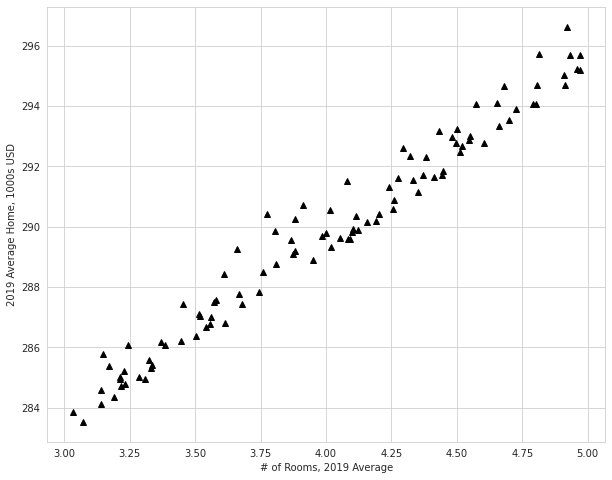

In [133]:
plt.plot(rooms, price, 'k^')
plt.xlabel('# of Rooms, 2019 Average')
plt.ylabel('2019 Average Home, 1000s USD')
plt.show()

## linear Regression
- rooms are predictors x
- price predictant y

In [134]:
X = rooms
y = price
LinReg = LinearRegression()
LinReg.fit(X, y)
# regression parameters - starting from 265.7, every additional rooms cost approx. $6020
print(LinReg.intercept_, LinReg.coef_ )

[265.89478208] [[5.9738168]]


*linear regression function*
- y = mx + b
- b: intercept = 265.7
- m: slope = 6.02

In [135]:
# R^2 score
LinReg.score(X, y)

0.9665313855197303

## multiple linear regression
Multiple linear regression is used to estimate the relationship between <br>
two or more independent variables X and one dependent variable y

In [136]:
import seaborn as sns
sns.set_style('whitegrid')
from collections import Counter

In [137]:
adress = 'data/enrollment_forecast.csv'
enroll = pd.read_csv(adress)
enroll.columns = ['year', 'enroll', 'unemploy', 'grad_rate', 'income'] # name columns
enroll.head()

,year,enroll,unemploy,grad_rate,income
0,1,5501,8.1,9552,1923
1,2,5945,7.0,9680,1961
2,3,6629,7.3,9731,1979
3,4,7556,7.5,11666,2030
4,5,8716,7.0,14675,2112


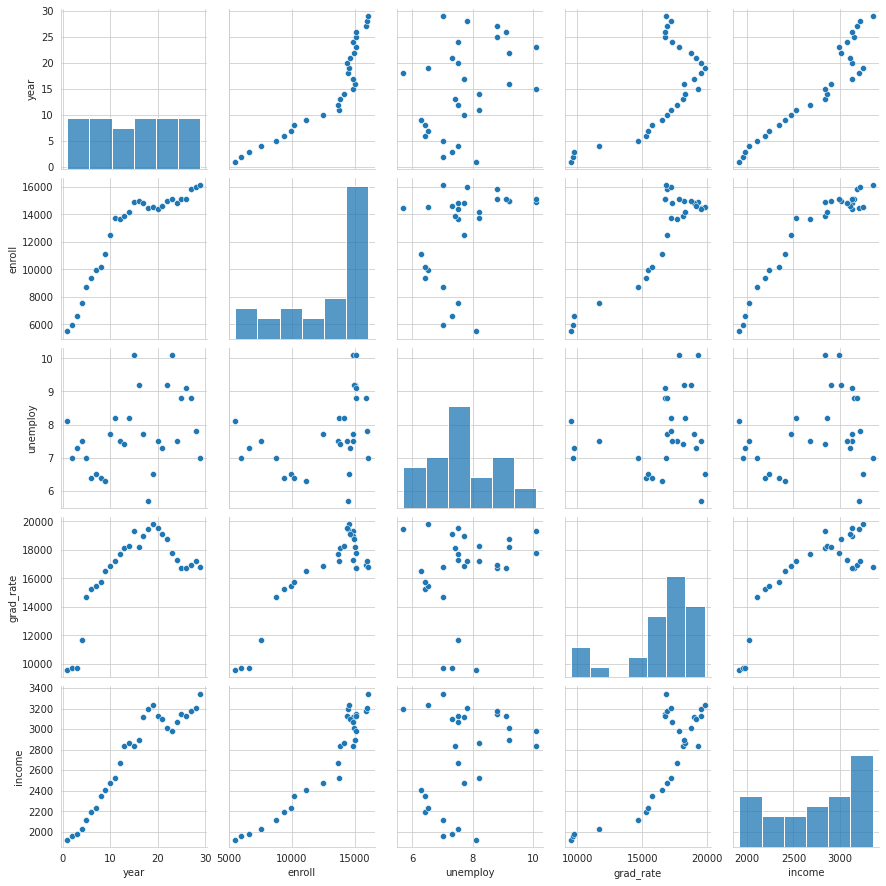

In [138]:
# is there a linear relationship 
# between the predictor and the predictants?
# check correlation with pairplot
sns.pairplot(enroll);

In [139]:
# predictors should be independent
# income and enrollment seem to be  highly correlated
# while unemployment and graduation rate do not
enroll.corr()

,year,enroll,unemploy,grad_rate,income
year,1.000000,0.900934,0.378305,0.670300,0.944287
enroll,0.900934,1.000000,0.391344,0.890294,0.949876
unemploy,0.378305,0.391344,1.000000,0.177376,0.282310
grad_rate,0.670300,0.890294,0.177376,1.000000,0.820089
income,0.944287,0.949876,0.282310,0.820089,1.000000


In [140]:
# values gives an array
enroll_data = enroll[['unemploy', 'grad_rate']].values # predictors
enroll_target = enroll[['enroll']].values # predictant
enroll_data_names = ['unemploy', 'grad_rate']
X, y = scale(enroll_data), enroll_target # standardize the predictors with scale

In [141]:
missing_values = X==np.NAN # array of True and False
X[missing_values==True] # compares array with T/F with X and returns positions where np.NAN is true

array([], dtype=float64)

In [142]:
LinReg = LinearRegression(normalize=True).fit(X, y)
LinReg.score(X, y)

0.8488812666133723

# Logistic Regression
- Logistic regression is a classification algorithm. 
- It predicts categories for ordinal variables
- It is used to predict the value of a numeric categorical (binary or ordinal) variable based on its relationship with predictor variables
- predictors should be independent and obseravtions > 50  per predictor variable

In [143]:
import pandas as pd
import seaborn as sb
from  pandas import Series, DataFrame
from pylab import rcParams
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict

from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score


In [144]:
titanic_training = pd.read_csv('data/titanic-training-data.csv')

## Cleaning

In [145]:
titanic_training.columns = ['PassangerId', 'Survived', 'Pclass', 'Name', 
'Sex', 'Age', 'SibSp','Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']
titanic_training.head(3)

,PassangerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [146]:
# missing values, enough records (50 per explanatory feature) ?
titanic_training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassangerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### VARIABLE DESCRIPTIONS
Survived - Survival (0 = No; 1 = Yes)<br>
Pclass - Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)<br>
Name - Name<br>
Sex - Sex<br>
Age - Age<br>
SibSp - Number of Siblings/Spouses Aboard<br>
Parch - Number of Parents/Children Aboard<br>
Ticket - Ticket Number<br>
Fare - Passenger Fare (British pound)<br>
Cabin - Cabin<br>
Embarked - Port of Embarkation (C = Cherbourg, France; Q = Queenstown, UK; S = Southampton - Cobh, Ireland)

### Checking that your target variable is binary

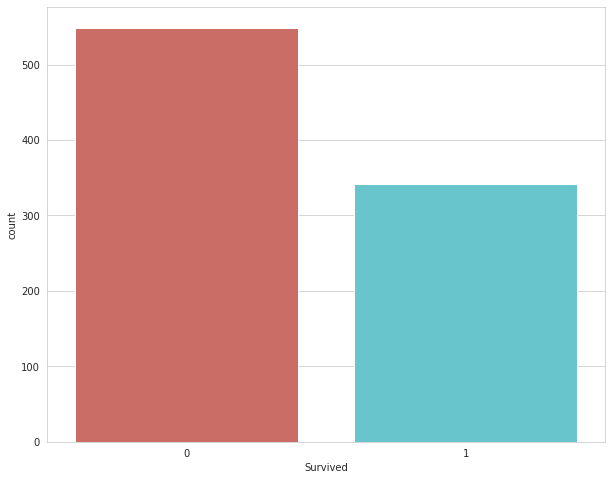

In [147]:
sb.countplot(x='Survived', data= titanic_training, palette='hls');

### check missing values

In [148]:
titanic_training.isnull().sum()

PassangerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [149]:
titanic_training.describe() # only numeric columns are shown

,PassangerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [27]:
# drop unneccessary columns
titanic_data = titanic_training.drop(['Name', 'Ticket', 'Cabin'], axis=1)
titanic_data.head()

,PassangerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


### impute missing Age
- there seems to be a relationship between relatives onboard and age
- ralatives onbaoard 'Parch' has no missing values
- thus we impute missing age values with the mean age of persons grouped by there number of relatives onbard

<AxesSubplot:xlabel='Parch', ylabel='Age'>

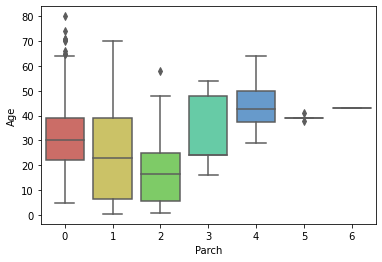

In [28]:
# relationship between age and relatives on the boat
sb.boxplot(x= 'Parch', y='Age', data=titanic_data, palette='hls')

In [29]:
Parch_groups = titanic_data.groupby(titanic_data['Parch'])
Parch_groups.mean()

,PassangerId,Survived,Pclass,Age,SibSp,Fare
Parch,,,,,,
0,445.255162,0.343658,2.321534,32.178503,0.237463,25.586774
1,465.110169,0.550847,2.203390,24.422000,1.084746,46.778180
2,416.662500,0.500000,2.275000,17.216912,2.062500,64.337604
3,579.200000,0.600000,2.600000,33.200000,1.000000,25.951660
4,384.000000,0.000000,2.500000,44.500000,0.750000,84.968750
5,435.200000,0.200000,3.000000,39.200000,0.600000,32.550000
6,679.000000,0.000000,3.000000,43.000000,1.000000,46.900000


In [30]:
def age_approx(cols):
    Age = cols[0]
    Parch = cols[1]

    if pd.isnull(Age):
        if Parch == 0:
            return 32
        elif Parch == 1:
            return 24
        elif Parch == 2:
            return 17
        elif Parch == 3:
            return 33
        elif Parch == 4:
            return 45
        else:
            return 30
    else:
        return Age

In [32]:
titanic_data['Age'] = titanic_data[['Age', 'Parch']].apply(age_approx, axis=1)
titanic_data.isnull().sum()

PassangerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       2
dtype: int64

In [33]:
# drop the two NA under Embark
titanic_data.dropna(inplace=True)
titanic_data.reset_index(inplace=True, drop=True)
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 889 entries, 0 to 888
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassangerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Sex          889 non-null    object 
 4   Age          889 non-null    float64
 5   SibSp        889 non-null    int64  
 6   Parch        889 non-null    int64  
 7   Fare         889 non-null    float64
 8   Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(2)
memory usage: 62.6+ KB


### encoding categories to numeric

In [34]:
# sex to integers - 1 = male / 0 = female
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
gender_encoded = label_encoder.fit_transform(titanic_data['Sex'])
gender_encoded[0:5]

array([1, 0, 0, 0, 1])

In [35]:
titanic_data.head()

,PassangerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


In [36]:
# male? yes = 1; no=0
gender_df = pd.DataFrame(gender_encoded, columns=['male_gender'])
gender_df.head()

,male_gender
0,1
1,0
2,0
3,0
4,1


### one hot encoding 
numeric to binary bc ordinal scale makes no sense

In [37]:
# Embarked to integers - has more than two categories
embarked_cat = titanic_data['Embarked']
embarked_encoded = label_encoder.fit_transform(embarked_cat)
embarked_encoded[0:100]

array([2, 0, 2, 2, 2, 1, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 1, 2, 2, 0, 2, 2,
       1, 2, 2, 2, 0, 2, 1, 2, 0, 0, 1, 2, 0, 2, 0, 2, 2, 0, 2, 2, 0, 0,
       1, 2, 1, 1, 0, 2, 2, 2, 0, 2, 0, 2, 2, 0, 2, 2, 0, 2, 2, 0, 0, 2,
       2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2])

In [44]:
from sklearn.preprocessing import OneHotEncoder
binary_encoder = OneHotEncoder(categories ='auto')
embarked_1hot = binary_encoder.fit_transform(embarked_encoded.reshape(-1, 1)) # respahe to a single column
embarked_1hot_mat = embarked_1hot.toarray() # transforms it to a matrix
embarked_df = pd.DataFrame(embarked_1hot_mat, columns= ['C', 'Q', 'S'])

In [45]:
#  embarked is now a binary category
embarked_df.head()

,C,Q,S
0,0.0,0.0,1.0
1,1.0,0.0,0.0
2,0.0,0.0,1.0
3,0.0,0.0,1.0
4,0.0,0.0,1.0


In [ ]:
# Sex and Embarked are now encoded the originals are dispensable
titanic_data.drop(['Sex', 'Embarked'], axis=1, inplace=True)

In [48]:
titanic_data.head()

,PassangerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


### concat

In [49]:
# concatenate the encoded and cleaned df
titanic_dmy = pd.concat([titanic_data, gender_df, embarked_df ], axis = 1, verify_integrity=True).astype(float)
titanic_dmy.head()

,PassangerId,Survived,Pclass,Age,SibSp,Parch,Fare,male_gender,C,Q,S
0,1.0,0.0,3.0,22.0,1.0,0.0,7.2500,1.0,0.0,0.0,1.0
1,2.0,1.0,1.0,38.0,1.0,0.0,71.2833,0.0,1.0,0.0,0.0
2,3.0,1.0,3.0,26.0,0.0,0.0,7.9250,0.0,0.0,0.0,1.0
3,4.0,1.0,1.0,35.0,1.0,0.0,53.1000,0.0,0.0,0.0,1.0
4,5.0,0.0,3.0,35.0,0.0,0.0,8.0500,1.0,0.0,0.0,1.0


## checking for parameters independence

<AxesSubplot:>

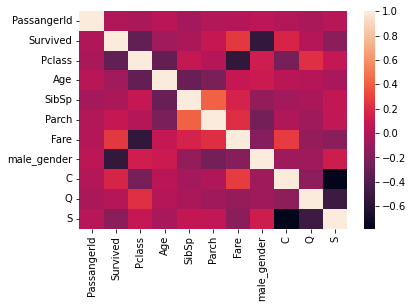

In [53]:
# plot of correlation
# positively correlated > 0
# negatively correlated < 0
# correlation near to plus or minus 1 indicates high dependency 
sb.heatmap(titanic_dmy.corr())

In [54]:
# drop the highly correlated fetaures - maybe one of them is enough to drop
titanic_dmy.drop(['Fare', 'Pclass'], axis=1, inplace=True)
titanic_dmy.head()

,PassangerId,Survived,Age,SibSp,Parch,male_gender,C,Q,S
0,1.0,0.0,22.0,1.0,0.0,1.0,0.0,0.0,1.0
1,2.0,1.0,38.0,1.0,0.0,0.0,1.0,0.0,0.0
2,3.0,1.0,26.0,0.0,0.0,0.0,0.0,0.0,1.0
3,4.0,1.0,35.0,1.0,0.0,0.0,0.0,0.0,1.0
4,5.0,0.0,35.0,0.0,0.0,1.0,0.0,0.0,1.0


In [55]:
# we have 6 predictive features, 'Survived' is the target
# a rule of thumbs says you need at least 50 records per feature
# 6 * 50 = 300
titanic_dmy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 889 entries, 0 to 888
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassangerId  889 non-null    float64
 1   Survived     889 non-null    float64
 2   Age          889 non-null    float64
 3   SibSp        889 non-null    float64
 4   Parch        889 non-null    float64
 5   male_gender  889 non-null    float64
 6   C            889 non-null    float64
 7   Q            889 non-null    float64
 8   S            889 non-null    float64
dtypes: float64(9)
memory usage: 62.6 KB


## train test split

In [56]:
X_train, X_test, y_train, y_test = train_test_split(titanic_dmy.drop('Survived', axis=1), 
                                                                                        titanic_dmy['Survived'], test_size=0.2,
                                                                                        random_state=200)

In [57]:
X_train.shape, y_train.shape

((711, 8), (711,))

In [58]:
X_train.head()

,PassangerId,Age,SibSp,Parch,male_gender,C,Q,S
719,721.0,6.0,0.0,1.0,0.0,0.0,0.0,1.0
165,167.0,24.0,0.0,1.0,0.0,0.0,0.0,1.0
879,882.0,33.0,0.0,0.0,1.0,0.0,0.0,1.0
451,453.0,30.0,0.0,0.0,1.0,1.0,0.0,0.0
181,183.0,9.0,4.0,2.0,1.0,0.0,0.0,1.0


In [59]:
LogReg = LogisticRegression(solver='liblinear')
LogReg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [61]:
y_pred = LogReg.predict(X_test)

# Model Evaluation

#### classification report withot cross-validation

In [72]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.83      0.88      0.85       109
         1.0       0.79      0.71      0.75        69

    accuracy                           0.81       178
   macro avg       0.81      0.80      0.80       178
weighted avg       0.81      0.81      0.81       178



#### k-fold cross validation & confusion matrix

In [75]:
# in the confusion matrix:
# correct predictions are on the left-upper to right-lower diagonal (377, 180)
# incorrect predictions are on the lower-left to upper-right diagonal
y_train_pred = cross_val_predict(LogReg, X_train, y_train, cv=5)
confusion_matrix(y_train, y_train_pred)

array([[377,  63],
       [ 91, 180]])

In [76]:
# Precision: how often the classiﬁer is correct when it predicts positive: 
# precision = tp / (tp +fp)
precision_score(y_train, y_train_pred)

0.7407407407407407

### make a test prediction

In [77]:
titanic_dmy[863:864] # pick a passenger

,PassangerId,Survived,Age,SibSp,Parch,male_gender,C,Q,S
863,866.0,1.0,42.0,0.0,0.0,0.0,0.0,0.0,1.0


In [80]:
import numpy as np
# slightly different test passenger should 
test_passenger = np.array([866, 40, 0, 0 ,0 , 0, 0, 1 ]).reshape(1, -1)
print(LogReg.predict(test_passenger)) 
print(LogReg.predict_proba(test_passenger))

[1.]
[[0.26351831 0.73648169]]


In [92]:
ww = np.array([866, 40, 0, 0, 0, 0, 0, 1]).reshape(1, -1)
ww

array([[866,  40,   0,   0,   0,   0,   0,   1]])